# 1. Import and Install Dependencies

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time
import mediapipe as mp

In [3]:
#!python -V

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model - make our detection 
mp_drawing = mp.solutions.drawing_utils # Drawing utilities - make our drawings

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
# Check the video properties
cap2 = cv2.VideoCapture(0)

print('video frame width = ',cap2.get(cv2.CAP_PROP_FRAME_WIDTH))
print('video frame height = ', cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))

# frame rate being used for frame extraction
print('frame rate = ', cap2.get(cv2.CAP_PROP_FPS))

# frame count in video
print('frame count in video = ', cap2.get(cv2.CAP_PROP_FRAME_COUNT))

video frame width =  640.0
video frame height =  480.0
frame rate =  30.0
frame count in video =  -1.0


In [9]:
cap = cv2.VideoCapture(os.path.join('Resources', 'Test_Videos','signs_aamir1.mp4'))

print('video frame width = ',cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print('video frame height = ', cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# frame rate being used for frame extraction
print('frame rate = ', cap.get(cv2.CAP_PROP_FPS))

# frame count in video
print('frame count in video = ', cap.get(cv2.CAP_PROP_FRAME_COUNT))

video frame width =  1080.0
video frame height =  1920.0
frame rate =  30.006688420924622
frame count in video =  329.0


In [10]:
cap = cv2.VideoCapture(os.path.join('Resources', 'Test_Videos','signs_adam.mp4'))

print('video frame width = ',cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print('video frame height = ', cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# frame rate being used for frame extraction
print('frame rate = ', cap.get(cv2.CAP_PROP_FPS))

# frame count in video
print('frame count in video = ', cap.get(cv2.CAP_PROP_FRAME_COUNT))

video frame width =  352.0
video frame height =  640.0
frame rate =  59.41041212824007
frame count in video =  2096.0


In [11]:
def video_resizing(frame, w, h):
    
    # resizing image
    width = int(w)
    height = int(h)
    dimensions = (width,height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

In [12]:
def video_rescaling(frame, scale):
    
    # sclaing image
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width,height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

In [13]:
# def mobile_video_preprocess(frame, w, h):
    
#     # rotate image 
#     #frame = cv2.rotate(frame, cv2.ROTATE_180)
    
# #     # sclaing image
# #     width = int(frame.shape[1] * scale)
# #     height = int(frame.shape[0] * scale)
    
#     # resizing image
#     width = int(w)
#     height = int(h)
#     dimensions = (width,height)
    
#     return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

In [202]:
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture(os.path.join('Resources', 'Test_Videos','signs_adam.mp4'))
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_holistic.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = holistic.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [47]:
# #cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture(os.path.join('Resources', 'Test_Videos','signs_adam.mp4'))
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
# for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):

#         # Read feed
#         ret, frame = cap.read()
        
#         # rotate image
#         frame = cv2.rotate(frame, cv2.ROTATE_180)
        
#         # video resizing
#         resized_frame = video_resizing(frame, 640, 680)
        
#         # Make detections
#         image, results = mediapipe_detection(resized_frame, holistic)
#         #print(results)
        
#         # Draw landmarks
#         draw_landmarks(image, results)

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [187]:
cap.release()
cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame, results)

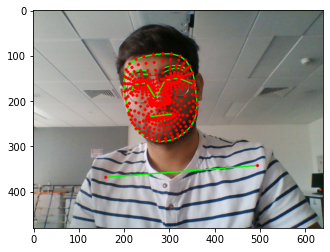

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.left_hand_landmarks 
#     else np.zeros(1404)

In [31]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.42243218,  0.40501478, -1.25651908, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
# np.save('0', result_test)

In [16]:
# np.load('0.npy')

# 4. Setup Folders for Collection

In [17]:
# # create a main folder for collection
# if not os.path.exists(os.path.join('Resources', 'My Sample Data','Test1')):
#     os.makedirs(os.path.join('Resources', 'My Sample Data','Test1'))

In [154]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Resources', 'My Sample Data','Test17')

# Actions that we try to detect
#actions = np.array(['NoSign','hello', 'thanks', 'iloveyou'])
actions = np.array(['hello', 'sup'])

# 40 videos worth of data
no_sequences = 5

# Videos are going to be 25 frames in length
sequence_length = 25

# Folder start
start_folder = 30

In [155]:
# [30 videos x No. of actions, 30 frames per video, 1662 datapoints per frame]

In [156]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [127]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.waitKey(2000)
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        blank_screen = np.zeros((480,640,3), dtype="uint8")
        cv2.imshow('OpenCV Feed', blank_screen)
        cv2.putText(blank_screen, 'Action: {}'.format(action), (170,210), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', blank_screen)
        cv2.waitKey(2000)
        
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (17,14), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (17,14), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [215]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data - Multiple Persons

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [119]:
actions = np.array(['NoSign','hello', 'thanks', 'please', 'sorry', 'you','where'])
label_map = {label:num for num, label in enumerate(actions)}
no_sequences = 40
sequence_length = 25

DATA_PATH = os.path.join('Resources', 'My Sample Data','Aamir','Data Collection')
sequences1, labels1 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences1.append(window)
        labels1.append(label_map[action])
        
DATA_PATH = os.path.join('Resources', 'My Sample Data','Adam','Data Collection')
sequences2, labels2 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences2.append(window)
        labels2.append(label_map[action])
        
DATA_PATH = os.path.join('Resources', 'My Sample Data','Ayesha','Data Collection')
sequences3, labels3 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences3.append(window)
        labels3.append(label_map[action])

In [120]:
X1 = np.array(sequences1)
X2 = np.array(sequences2)
X3 = np.array(sequences3)

X_final = np.append(np.append(np.append(X1, X2, axis=0),X3, axis=0)) #,X16, axis=0)

In [121]:
X14.shape

(120, 25, 1662)

In [122]:
X_final.shape

(420, 25, 1662)

In [123]:
y = np.array(labels8+labels14+labels15+labels16)
y_final = to_categorical(y).astype(int)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.05)

In [142]:
# actions = np.array(['NoSign','hello', 'thanks', 'iloveyou','please', 'yourewelcome', 'sorry'])
# label_map = {label:num for num, label in enumerate(actions)}

In [143]:
# label_map

# 6. Preprocess Data and Create Labels and Features

In [130]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'NoSign': 0, 'hello': 1, 'thanks': 2, 'iloveyou': 3}

In [ ]:
DATA_PATH = os.path.join('Resources', 'My Sample Data','Test1')

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

In [135]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

# run on notebook using: %tensorboard --logdir logs/fit

In [136]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(25,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [137]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [138]:
# path_1 = r'C:\Users\aamir\Desktop\UOWD\4 th year\Autmn 2022 - semester\CSIT321 - Project\Computer Vision\Trial'

In [139]:
# os.path.join(path_1,'Saved Best Models',"ep{epoch:03d}-loss{loss:.3f}.h5")

In [140]:
checkpoint_filepath = os.path.join('Saved Best Models',"Demo.h5")
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss', # or 'categorical_accuracy'
    mode='min', # or max
    save_best_only=True)

In [141]:
#model.fit(X_train, y_train, epochs=100, callbacks=[model_checkpoint_callback])
model.fit(X_train, y_train, epochs=1000, callbacks=[model_checkpoint_callback])
#model.fit(X_train, y_train, epochs=1000, batch_size=40, callbacks=[model_checkpoint_callback])

Epoch 1/1000
13/13 [==============================] - 5s 92ms/step - loss: 2.1663 - categorical_accuracy: 0.1599
Epoch 2/1000
13/13 [==============================] - 1s 96ms/step - loss: 2.2601 - categorical_accuracy: 0.2833
Epoch 3/1000
13/13 [==============================] - 1s 90ms/step - loss: 1.6839 - categorical_accuracy: 0.2935
Epoch 4/1000
13/13 [==============================] - 1s 94ms/step - loss: 1.2651 - categorical_accuracy: 0.4383
Epoch 5/1000
13/13 [==============================] - 1s 89ms/step - loss: 0.8904 - categorical_accuracy: 0.5548
Epoch 6/1000
13/13 [==============================] - 1s 93ms/step - loss: 0.8152 - categorical_accuracy: 0.5994
Epoch 7/1000
13/13 [==============================] - 1s 86ms/step - loss: 0.8055 - categorical_accuracy: 0.6120
Epoch 8/1000
13/13 [==============================] - 1s 110ms/step - loss: 1.0021 - categorical_accuracy: 0.5648
Epoch 9/1000
13/13 [==============================] - 1s 85ms/step - loss: 0.7789 - categorical

13/13 [==============================] - 1s 92ms/step - loss: 3.6074e-04 - categorical_accuracy: 1.0000
Epoch 72/1000
13/13 [==============================] - 1s 93ms/step - loss: 2.6852e-04 - categorical_accuracy: 1.0000
Epoch 73/1000
13/13 [==============================] - 1s 92ms/step - loss: 2.1506e-04 - categorical_accuracy: 1.0000
Epoch 74/1000
13/13 [==============================] - 1s 92ms/step - loss: 2.1004e-04 - categorical_accuracy: 1.0000
Epoch 75/1000
13/13 [==============================] - 1s 90ms/step - loss: 2.3717e-04 - categorical_accuracy: 1.0000
Epoch 76/1000
13/13 [==============================] - 1s 98ms/step - loss: 2.3920e-04 - categorical_accuracy: 1.0000
Epoch 77/1000
13/13 [==============================] - 1s 95ms/step - loss: 1.7521e-04 - categorical_accuracy: 1.0000
Epoch 78/1000
13/13 [==============================] - 1s 91ms/step - loss: 1.8592e-04 - categorical_accuracy: 1.0000
Epoch 79/1000
13/13 [==============================] - 1s 98ms/step - 

13/13 [==============================] - 1s 110ms/step - loss: 1.4061e-05 - categorical_accuracy: 1.0000
Epoch 140/1000
13/13 [==============================] - 2s 115ms/step - loss: 2.0556e-05 - categorical_accuracy: 1.0000
Epoch 141/1000
13/13 [==============================] - 1s 113ms/step - loss: 2.1772e-05 - categorical_accuracy: 1.0000
Epoch 142/1000
13/13 [==============================] - 1s 107ms/step - loss: 3.0252e-05 - categorical_accuracy: 1.00001s - loss: 6.2652e-05 - cate
Epoch 143/1000
13/13 [==============================] - 1s 101ms/step - loss: 1.2802e-05 - categorical_accuracy: 1.0000
Epoch 144/1000
13/13 [==============================] - 1s 99ms/step - loss: 1.3787e-05 - categorical_accuracy: 1.0000
Epoch 145/1000
13/13 [==============================] - 2s 120ms/step - loss: 1.2745e-05 - categorical_accuracy: 1.0000
Epoch 146/1000
13/13 [==============================] - 1s 101ms/step - loss: 1.3620e-05 - categorical_accuracy: 1.0000
Epoch 147/1000
13/13 [======

KeyboardInterrupt: 

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 25, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 25, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 132       
Total params: 596,708
Trainable params: 596,708
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [100]:
res = model.predict(X_test)

In [101]:
test_num = 3

In [102]:
print('Expected: ',actions[np.argmax(res[test_num])])
print('Predicted: ',actions[np.argmax(y_test[test_num])])

Expected:  hello
Predicted:  hello


# 9. Save Weights

In [103]:
#model.save('Model Weights\model_test3_train2.h5') # creates a HDF5 file 'my_model.h5'
#model.load_weights('Saved Best Models\test7_model.h5')

In [25]:
# from tensorflow.keras.models import load_model
# model = load_model('Saved Best Models/test7.h5')

In [227]:
#new_model = keras.models.load_model('Model Weights\model_test3_train2.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [104]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report

In [105]:
yhat = model.predict(X_test)

In [106]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [107]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[16,  0],
        [ 0,  8]],

       [[18,  1],
        [ 0,  5]],

       [[18,  0],
        [ 0,  6]],

       [[19,  0],
        [ 1,  4]]], dtype=int64)

In [108]:
accuracy_score(ytrue, yhat)

0.9583333333333334

In [109]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         6
           3       1.00      0.80      0.89         5

    accuracy                           0.96        24
   macro avg       0.96      0.95      0.95        24
weighted avg       0.97      0.96      0.96        24



# 11. Test in Real Time

In [116]:
colors = [(245,117,16), (117,245,16), (16,117,245),(16,117,245),(245,117,16), (117,245,16),(245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [247]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
#actions = np.array(['NoSign','please', 'yourewelcome', 'sorry', 'hello', 'thanks', 'iloveyou'])

## 30 frames realtime prediction

In [118]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

#os.path.join('Resources', 'Test_Videos','signs_aamir1')
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign


In [114]:
cap.release()
cv2.destroyAllWindows()

## 25 frames realtime prediction

In [117]:
actions = np.array(['NoSign','please', 'yourewelcome', 'sorry', 'hello', 'thanks', 'iloveyou'])

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-25:]
        
        if len(sequence) == 25:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign
NoSign


In [ ]:
cap.release()
cv2.destroyAllWindows()

## Mobile Video Prediction

In [ ]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.5

# #os.path.join('Resources', 'Test_Videos','signs_aamir1')
# #cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture(os.path.join('Resources', 'Test_Videos','signs_adam.mp4'))
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#          # rotate image
#         frame = cv2.rotate(frame, cv2.ROTATE_180)
        
#         # video resizing
#         resized_frame = video_resizing(frame, 480, 640)
        
#         # Make detections
#         image, results = mediapipe_detection(resized_frame, holistic)
#         #print(results)
        
#         # Draw landmarks
#         draw_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# Saving the trained model with weights

In [ ]:
# %%timeit
# %%time

## Pickle

In [40]:
# import pickle

In [ ]:
# # save the model
# with open('model_test3_train2.pickle', 'wb') as f: # 'wb' - write binary file
#     pickle.dump(model,f)

Too big can't pickle weakref objects => can't pickle weakref comes because Deep Learning models are too large and pickle only used for storing small models. Use this : HDF5 used for storing large data.

In [ ]:
# # loading the model
# with open('model_test3_train2', 'rb') as f: # 'rb' - read binary file
#     model_test3_train2 = pickle.load(f)

In [69]:
# Doesnt work - 'Sequential' object has no attribute 'to_pickle'
# model.to_pickle('Saved Models\model_pickle2.pickle')
# model_pickl = model.read_pickle('Saved Models\model_pickle2.pickle')

## Parquet

In [ ]:
# model.to_parquet('model_pickle2.parquet')

In [ ]:
# model_pickl = model.read_parquet('model_pickle2.parquet')

## Feather

In [ ]:
# model.to_feather('model_pickle2.feather')
# model_pickl = model.read_feather('model_pickle2.feather')

## Joblib

In [75]:
#from sklearn.externals import joblib
# import joblib

In [ ]:
# joblib.dump(model, 'model_test3_train2')

In [ ]:
#model_test3_train2 = joblib.load('model_test3_train2')